# Ch-3 Unconstrained Problems - Theory

## Optimality Conditions


### First Order Necessary Conditions
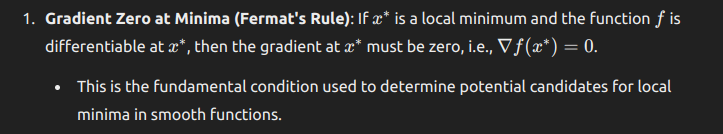

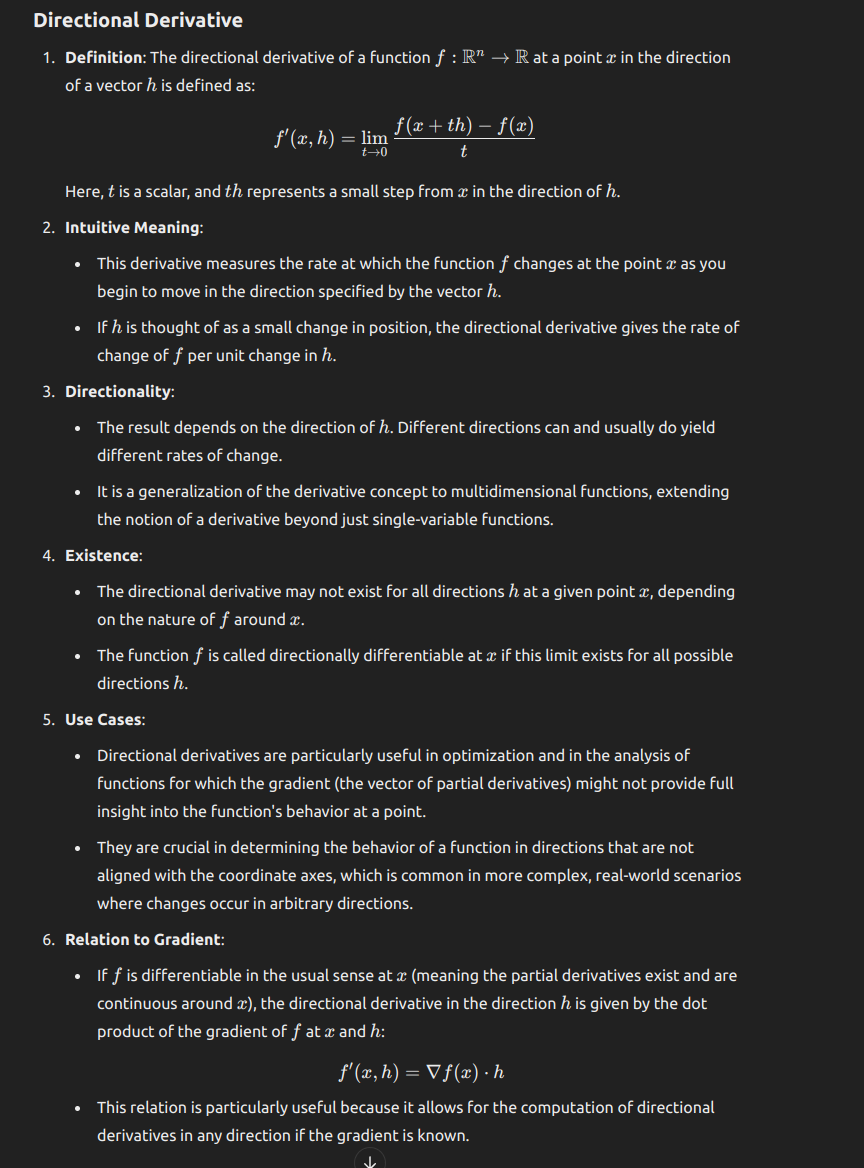

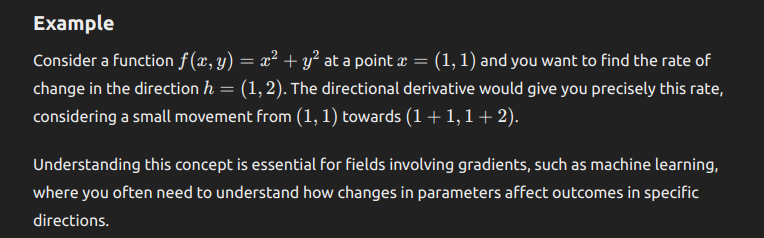

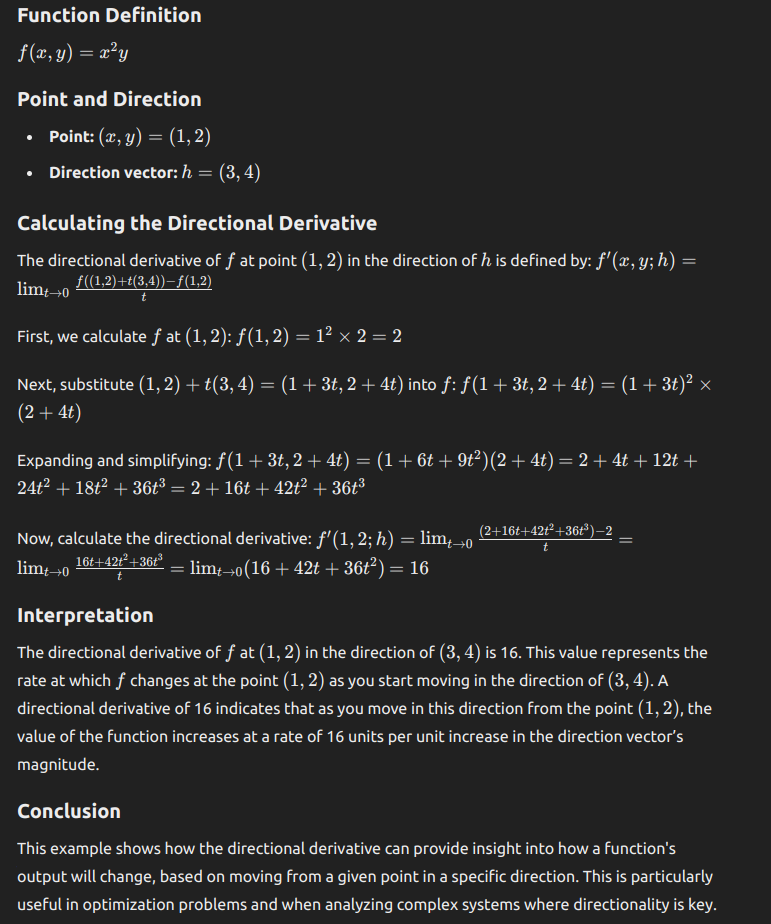

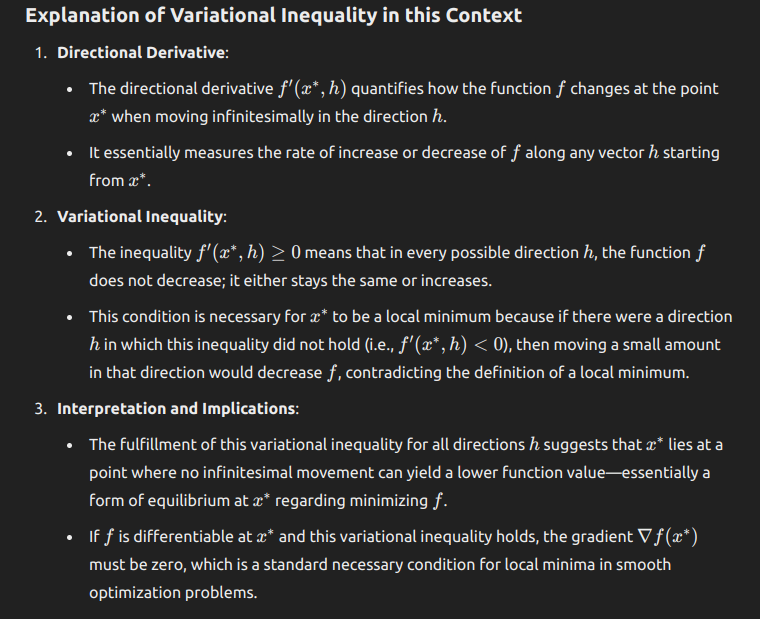


### Second Order Necessary Conditions

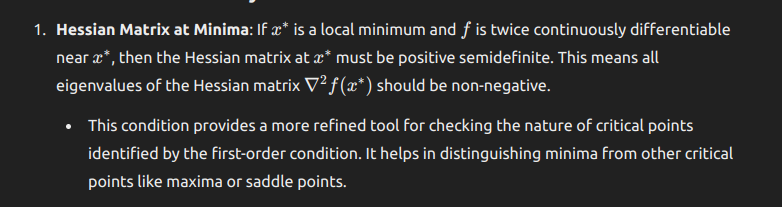

#### basics of 2nd order Necessary Conditions
When dealing with optimization problems, particularly in finding local minima, the first step is often to identify points where the gradient (in multivariable cases) or the first derivative (in single-variable cases) of the function equals zero (Fermat's Theorem). These points are known as `stationary points`. However, not all stationary points are minima. The second-order necessary conditions help in further classifying these points.

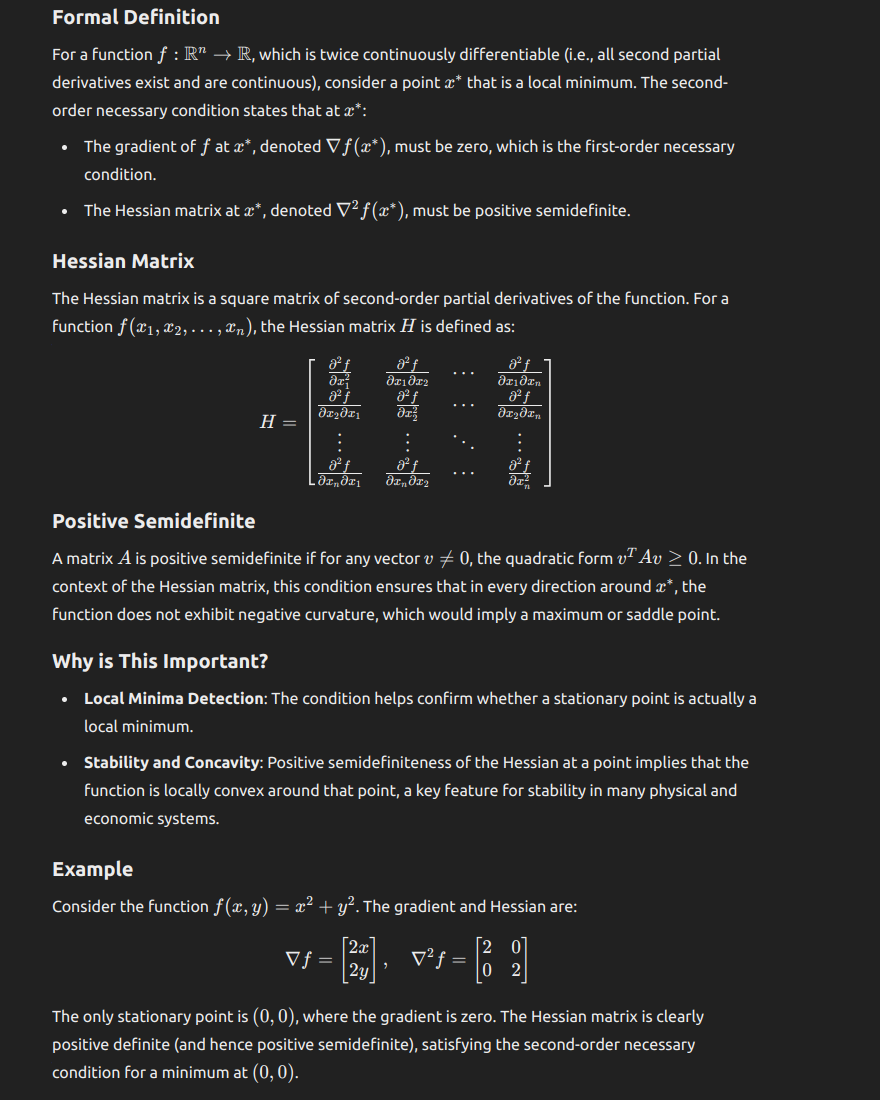

#### Conclusion
Second-order necessary conditions are critical in optimization for confirming the nature of stationary points. They provide assurance beyond the first derivative test and are indispensable in both theoretical and applied optimization, ensuring that solutions to minimization problems are indeed minima.

#### Methods to figure out Hessian is +ve semi-definite.
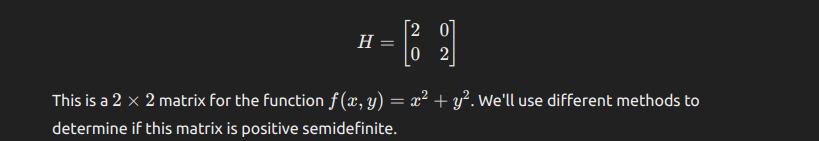

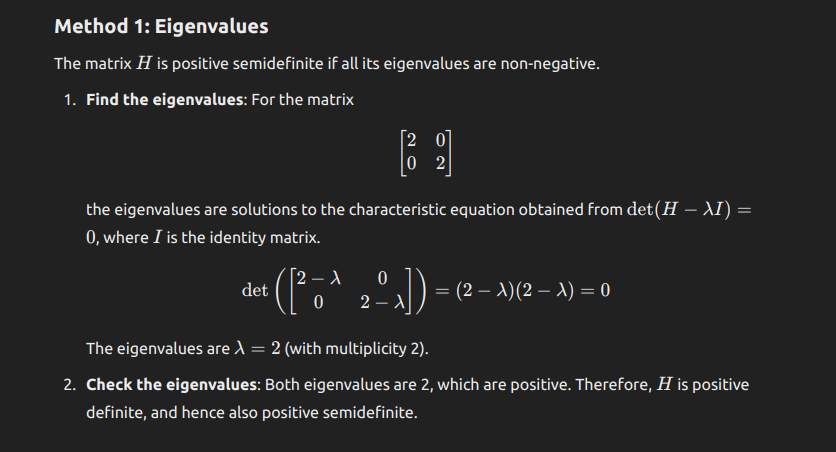

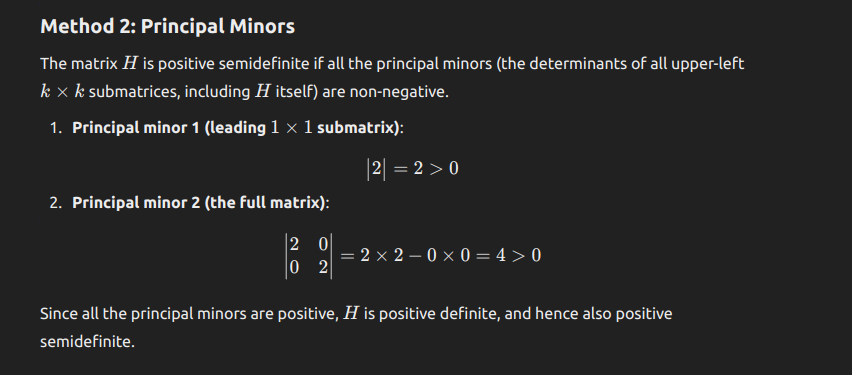

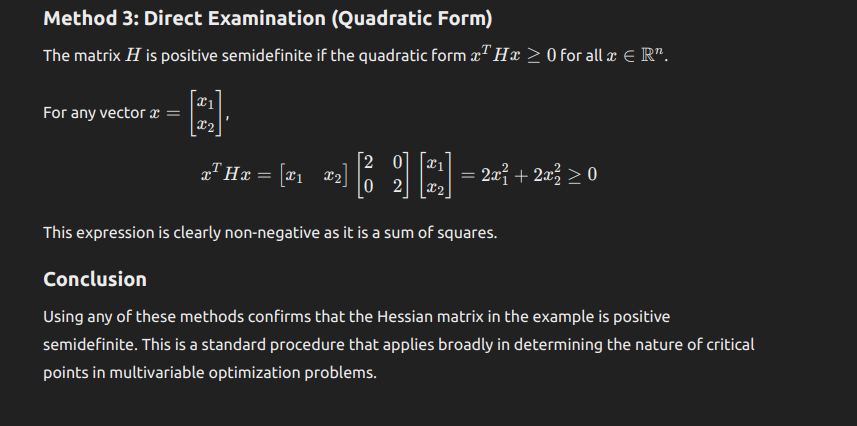

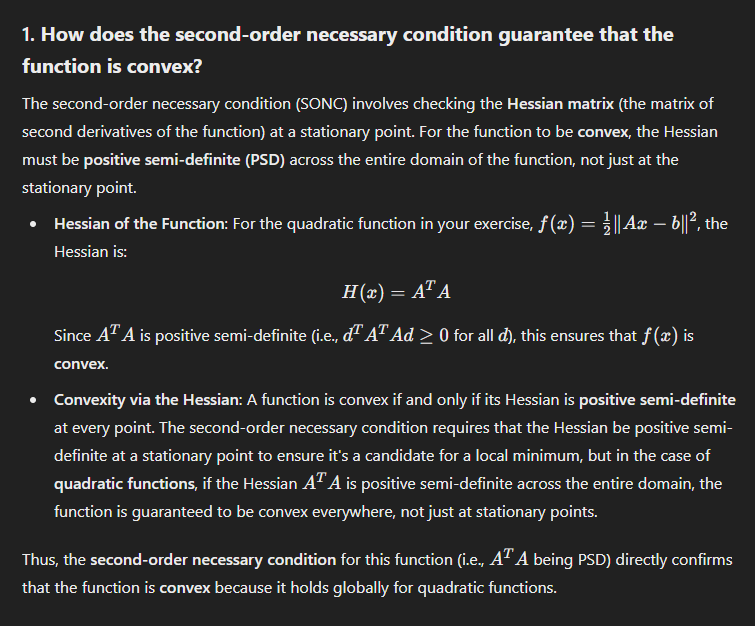

### 2nd Order Sufficient Conditions

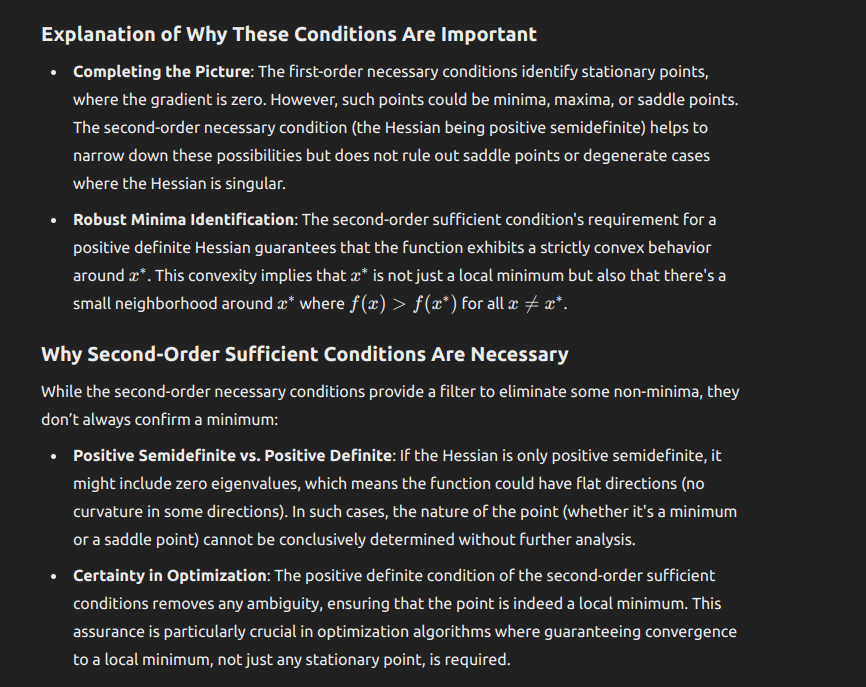

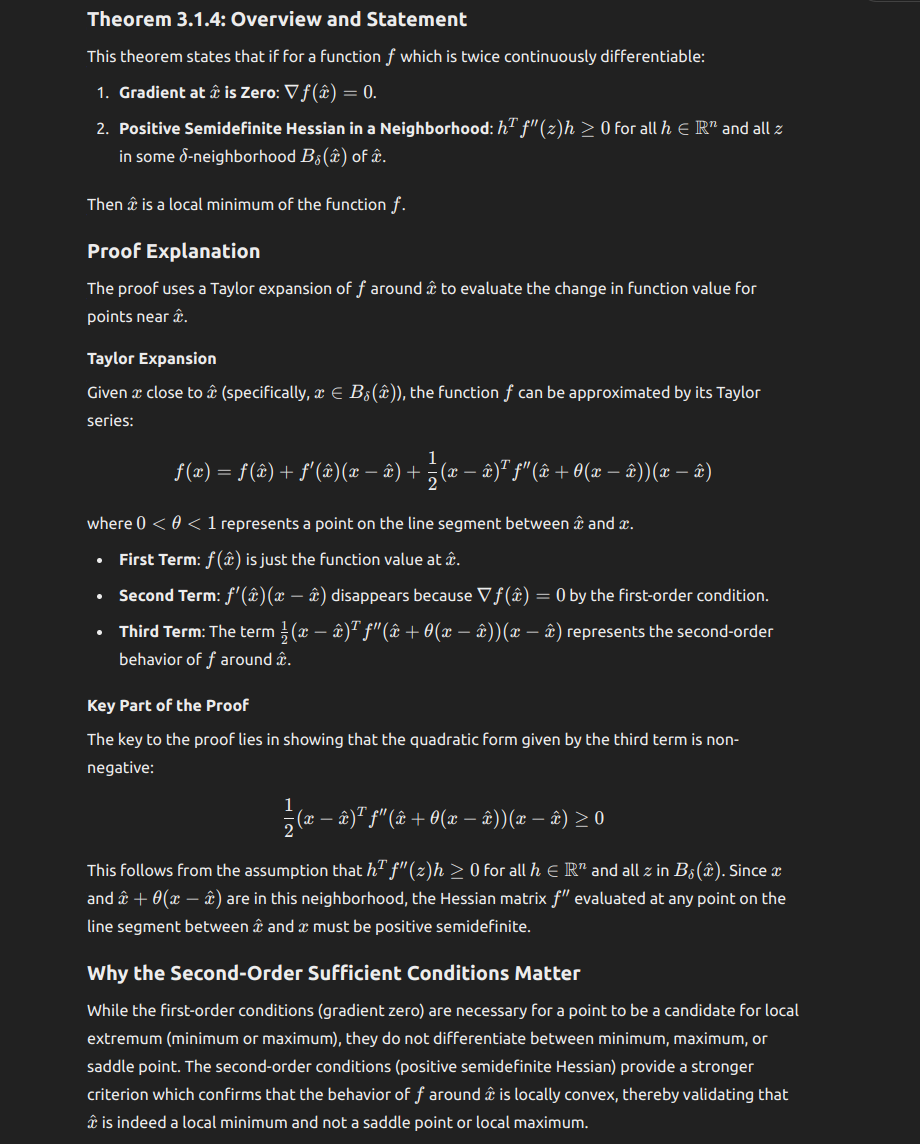

#### Conclusion
Theorem 3.1.4 plays a crucial role in optimization by ensuring that a point not only stops the decrease or increase (first-order) but also begins to increase in every direction (second-order), a more definitive indication of a local minimum. This assurance is vital for algorithms designed to find minimum values of functions, as it helps avoid false positives (like saddle points) that could disrupt the effectiveness of optimization strategies in practical applications such as engineering design, economics, and machine learning.

#### Theorem 3.1.5 (Quadratic Growth Condition)
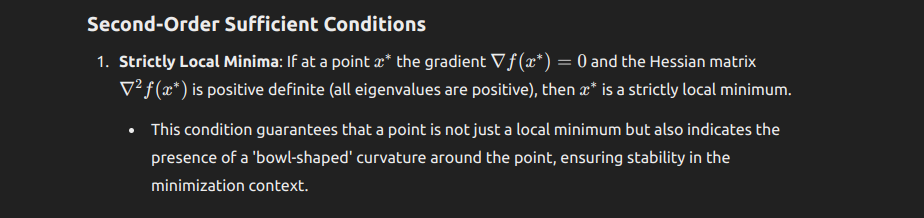

Theorem 3.1.5, often referred to in the context of optimization as the Quadratic Growth Condition, provides a significant insight into the behavior of a function at a local minimum, emphasizing how the function values not only are non-decreasing but actually grow quadratically away from the minimum point (eliminates the existance of a plauteau where function values might equal to the local min). This theorem helps in ensuring that the minimum is strict and robust, which is crucial for various practical applications in optimization, where stability around the minimum is necessary.

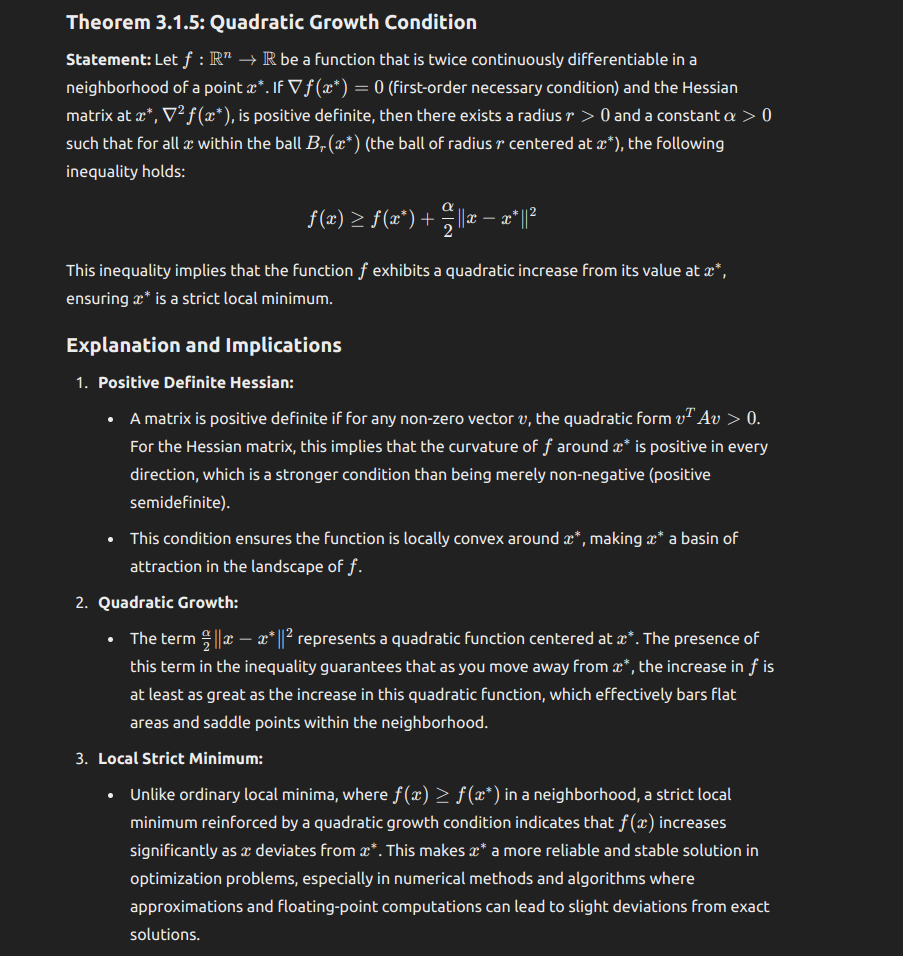

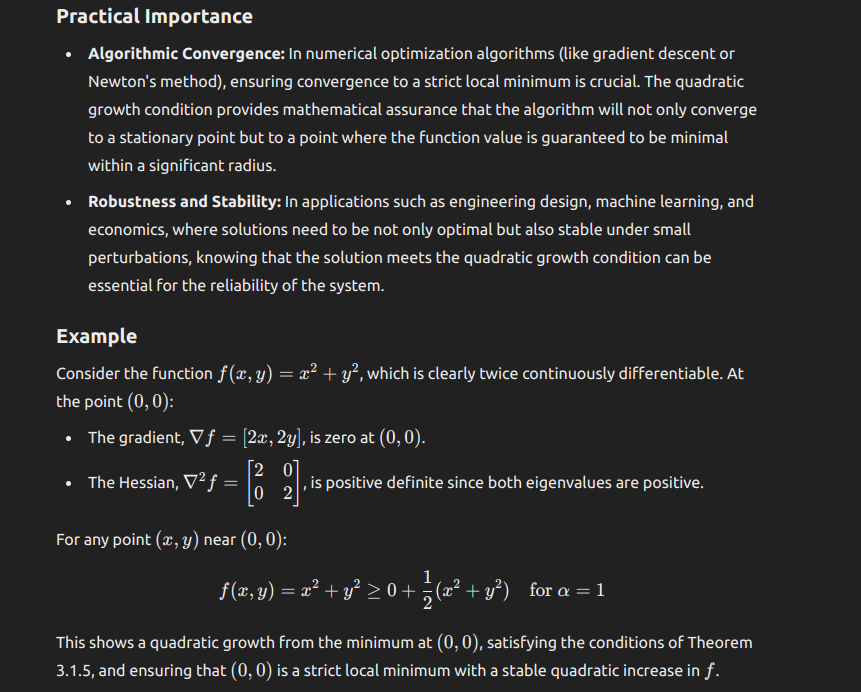


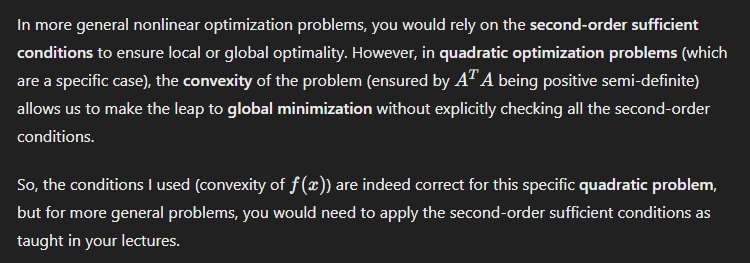


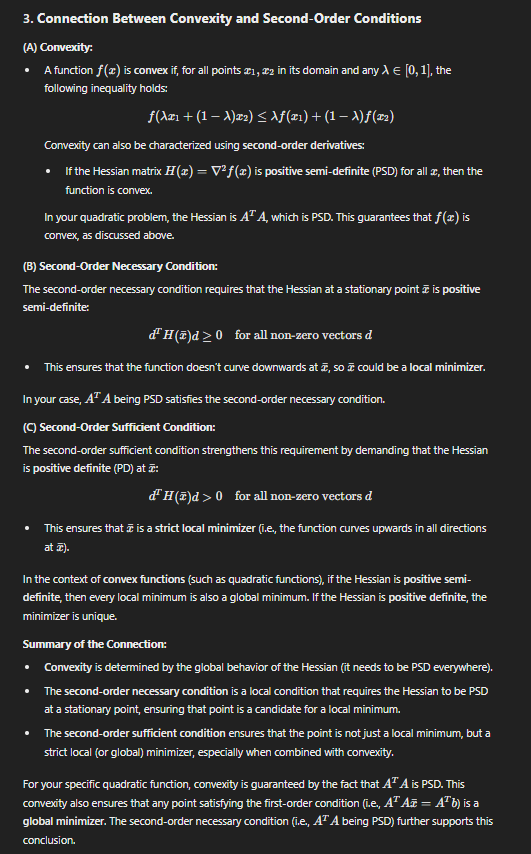

## Convex Optimization Problem (PU)
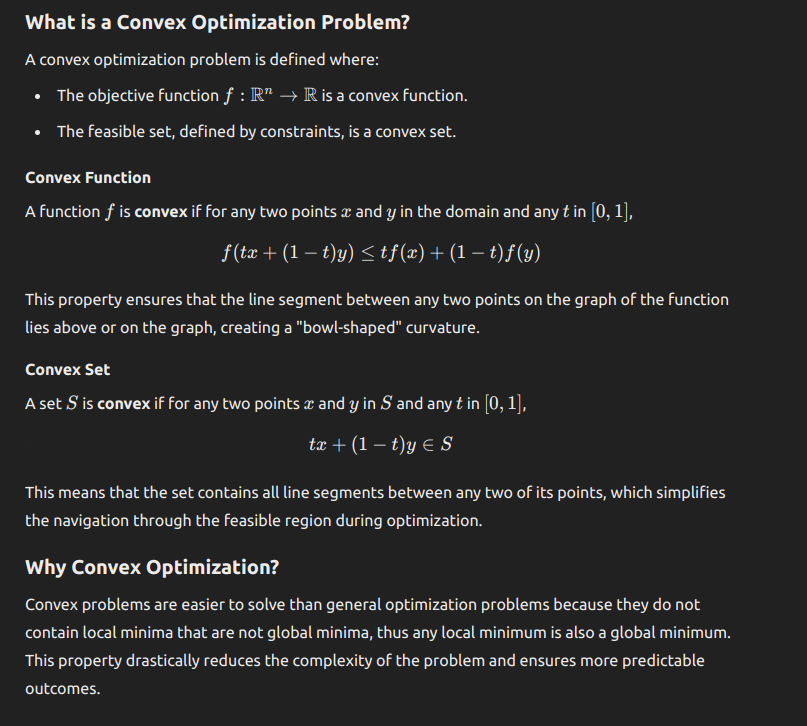

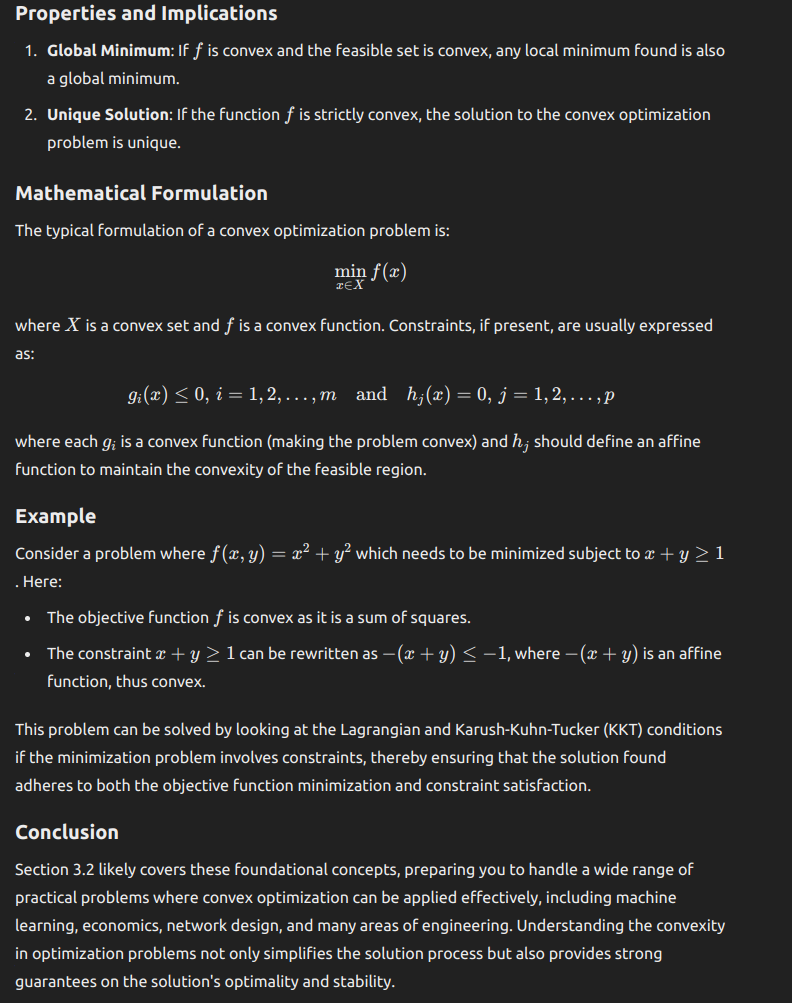

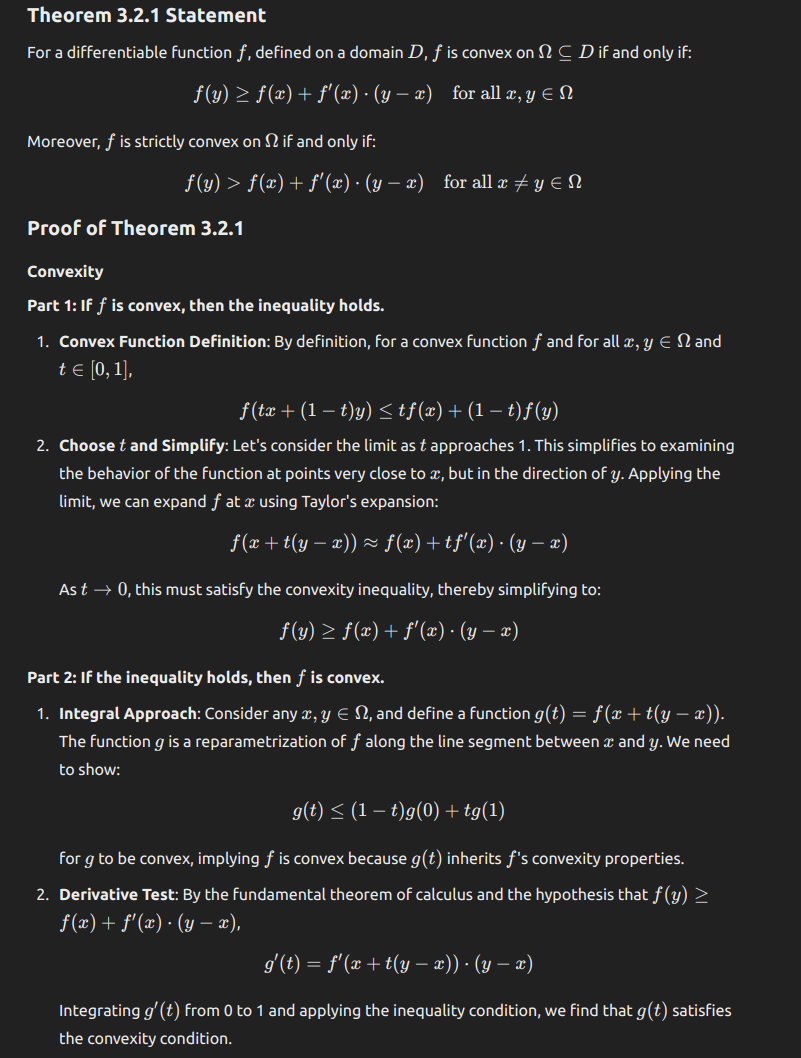
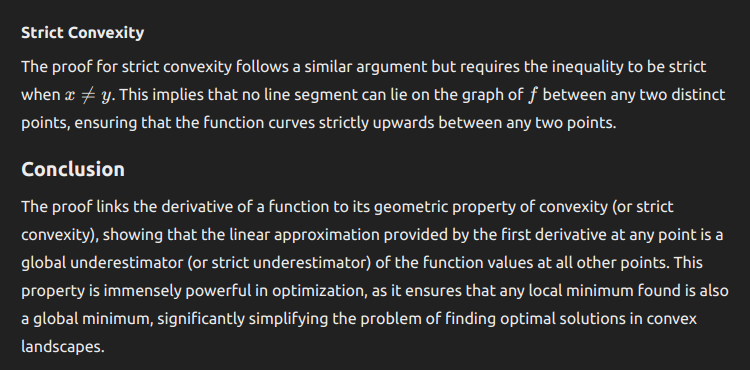


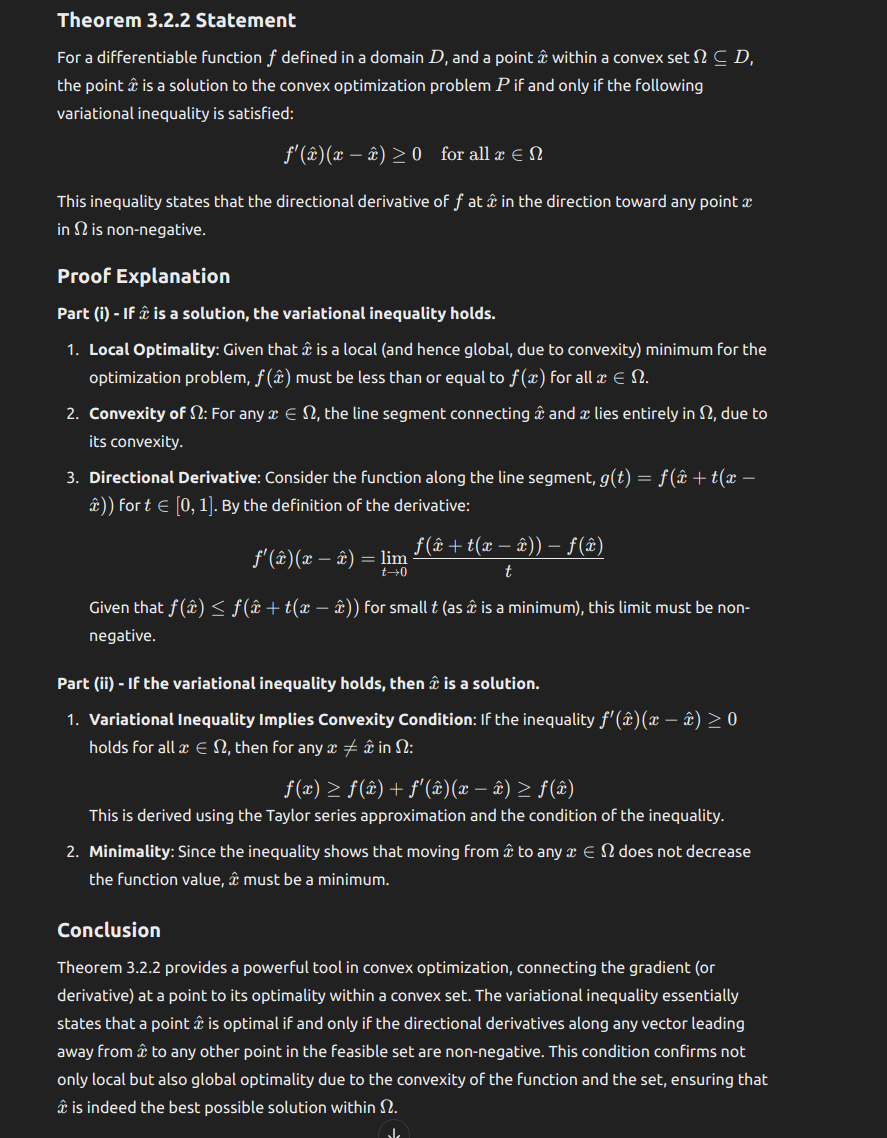

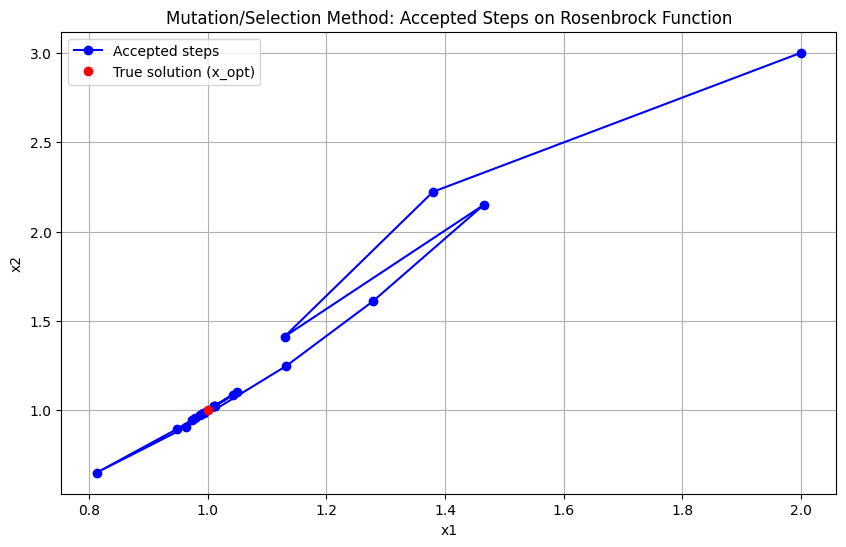

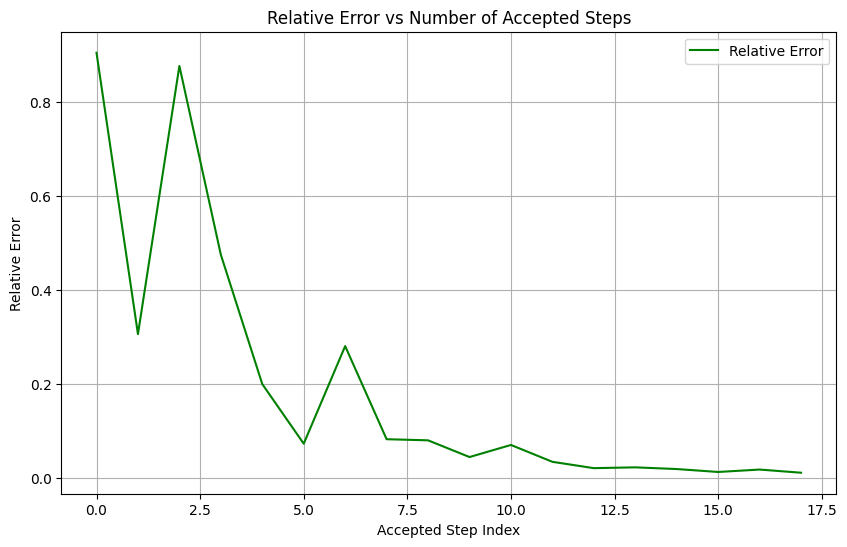

Final solution: [0.99324091 0.98699541]
Relative error: 0.010363507732349956


In [2]:
  # necessary lib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# function to be minimized - Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

N = 5000
beta = 5*10**(-3)
# initial point
x0 = np.array([2, 3])
x_opt = np.array([1.0, 1.0])  # True solution (Rosenbrock's minimum)

# Step size function
def step_size(k, beta):
    return 1 / (1 + beta * k)

# Initialize variables
x_current = x0
accepted_steps = [x_current]
errors = []

# Mutation/selection loop
for k in range(1, N + 1):
    # Step size for this iteration
    delta_k = step_size(k, beta)
    
    # Generate a random mutation direction (from a normal distribution)
    direction = np.random.randn(2)
    
    # Normalize the direction for a consistent step size
    direction = direction / np.linalg.norm(direction)
    
    # Propose a new point (mutation)
    x_new = x_current + delta_k * direction
    
    # Evaluate the Rosenbrock function at the new and current points
    f_current = rosenbrock(x_current)
    f_new = rosenbrock(x_new)
    
    # Selection: accept the new point if it improves the function value
    if f_new < f_current:
        x_current = x_new
        accepted_steps.append(x_current)
        
        # Calculate the relative error with respect to the true solution
        e_rel = np.linalg.norm(x_current - x_opt) / np.linalg.norm(x_opt)
        errors.append(e_rel)

# Convert accepted steps to a numpy array for easier plotting
accepted_steps = np.array(accepted_steps)

# Plotting the trajectory of accepted steps
plt.figure(figsize=(10, 6))
plt.plot(accepted_steps[:, 0], accepted_steps[:, 1], 'bo-', label='Accepted steps')
plt.plot(x_opt[0], x_opt[1], 'ro', label='True solution (x_opt)')
plt.title('Mutation/Selection Method: Accepted Steps on Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

# Plotting the relative error as a function of the number of accepted steps
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, 'g-', label='Relative Error')
plt.title('Relative Error vs Number of Accepted Steps')
plt.xlabel('Accepted Step Index')
plt.ylabel('Relative Error')
plt.legend()
plt.grid()
plt.show()

# Print the final result
print(f"Final solution: {x_current}")
print(f"Relative error: {errors[-1]}")

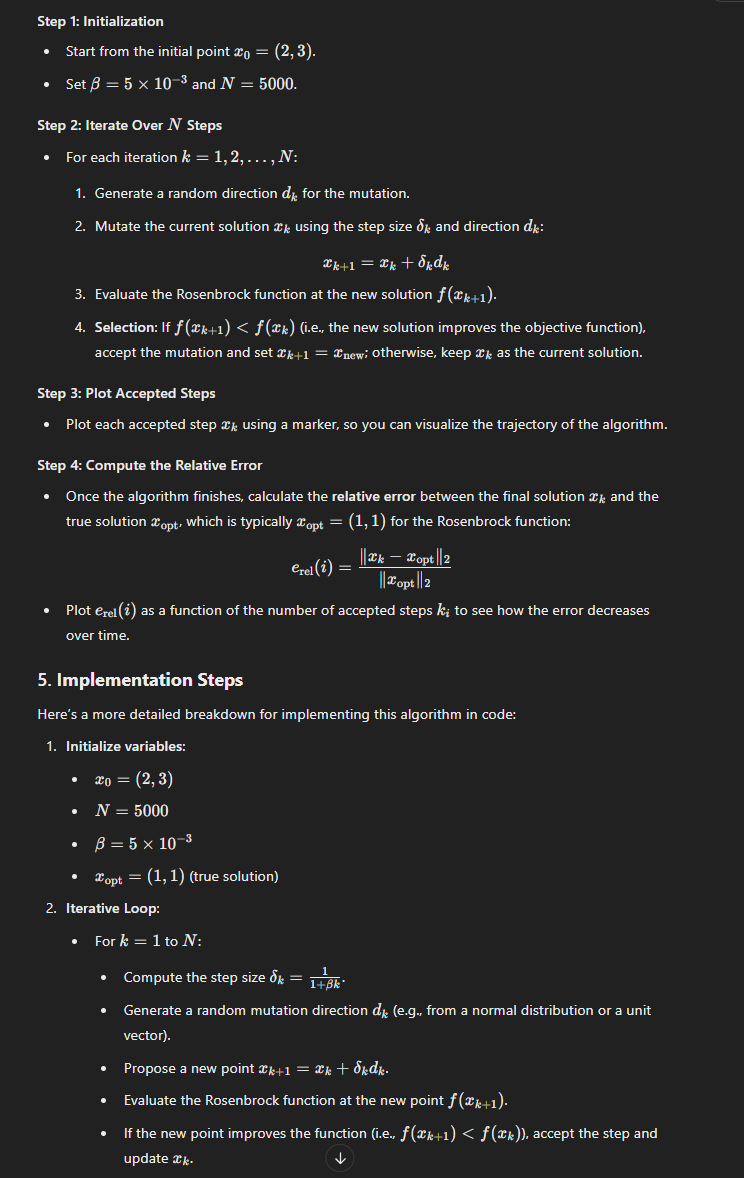


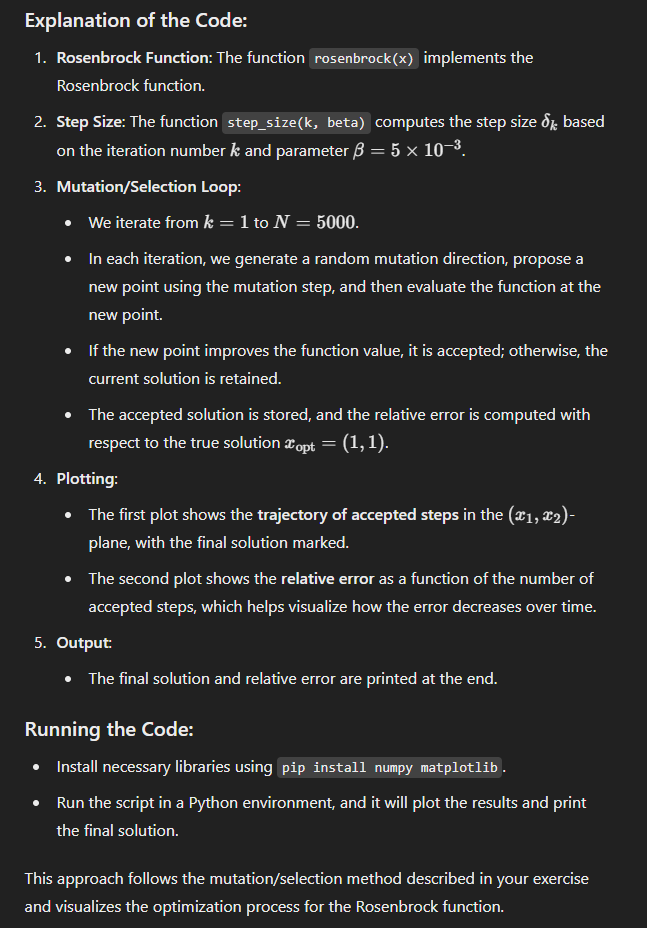